In [4]:
library(dplyr)
library(tidyverse)
library(VIM)
library(faraway)
library(ggplot2)
library(naniar)
library(GGally)
library(caret)
library(fastDummies)
library(leaps)
library(recipes)
library(rstan)
library(tree)
library(bayesplot)

Warning message:
"package 'tidyverse' was built under R version 4.2.3"
Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Warning message:
"package 'tibble' was built under R version 4.2.3"
Warning message:
"package 'tidyr' was built under R version 4.2.3"
Warning message:
"package 'readr' was built under R version 4.2.3"
Warning message:
"package 'purrr' was built under R version 4.2.3"
Warning message:
"package 'stringr' was built under R version 4.2.3"
Warning message:
"package 'lubridate' was built under R version 4.2.3"
── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract() masks rstan::extract()
✖ dplyr

## Background
403 African Americans were interviewed in a study to understand the prevalence of obesity, diabetes, and other cardiovascular risk factors in central Virginia. Glycosolated hemoglobin (glyhb) greater than 7.0 is usually taken as a positive diagnosis of diabetes. We are interested in identifying the most important predicotrs that contribute to a high glyhb level in african american patience while also creating a predictive model that accurately identifies patience with diabetes. 


### Questions to answer:
- How much ades Age, Sex, and Location impact the glyhb levels in patients
- Are there any interaction effects between waist, height, and hip that could explain glyhb levels.

In [5]:
head(diabetes)

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<fct>,<int>,<fct>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1000,203,82,56,3.6,4.31,Buckingham,46,female,62,121,medium,118,59,NA,NA,29,38,720
2,1001,165,97,24,6.9,4.44,Buckingham,29,female,64,218,large,112,68,NA,NA,46,48,360
3,1002,228,92,37,6.2,4.64,Buckingham,58,female,61,256,large,190,92,185,92,49,57,180
4,1003,78,93,12,6.5,4.63,Buckingham,67,male,67,119,large,110,50,NA,NA,33,38,480
5,1005,249,90,28,8.9,7.72,Buckingham,64,male,68,183,medium,138,80,NA,NA,44,41,300
6,1008,248,94,69,3.6,4.81,Buckingham,34,male,71,190,large,132,86,NA,NA,36,42,195


In [6]:
summary(diabetes)

       id             chol          stab.glu          hdl        
 Min.   : 1000   Min.   : 78.0   Min.   : 48.0   Min.   : 12.00  
 1st Qu.: 4792   1st Qu.:179.0   1st Qu.: 81.0   1st Qu.: 38.00  
 Median :15766   Median :204.0   Median : 89.0   Median : 46.00  
 Mean   :15978   Mean   :207.8   Mean   :106.7   Mean   : 50.45  
 3rd Qu.:20336   3rd Qu.:230.0   3rd Qu.:106.0   3rd Qu.: 59.00  
 Max.   :41756   Max.   :443.0   Max.   :385.0   Max.   :120.00  
                 NA's   :1                       NA's   :1       
     ratio            glyhb             location        age           gender   
 Min.   : 1.500   Min.   : 2.68   Buckingham:200   Min.   :19.00   male  :169  
 1st Qu.: 3.200   1st Qu.: 4.38   Louisa    :203   1st Qu.:34.00   female:234  
 Median : 4.200   Median : 4.84                    Median :45.00               
 Mean   : 4.522   Mean   : 5.59                    Mean   :46.85               
 3rd Qu.: 5.400   3rd Qu.: 5.60                    3rd Qu.:60.00        

In [8]:
table(diabetes$diabetesT)

< table of extent 0 >

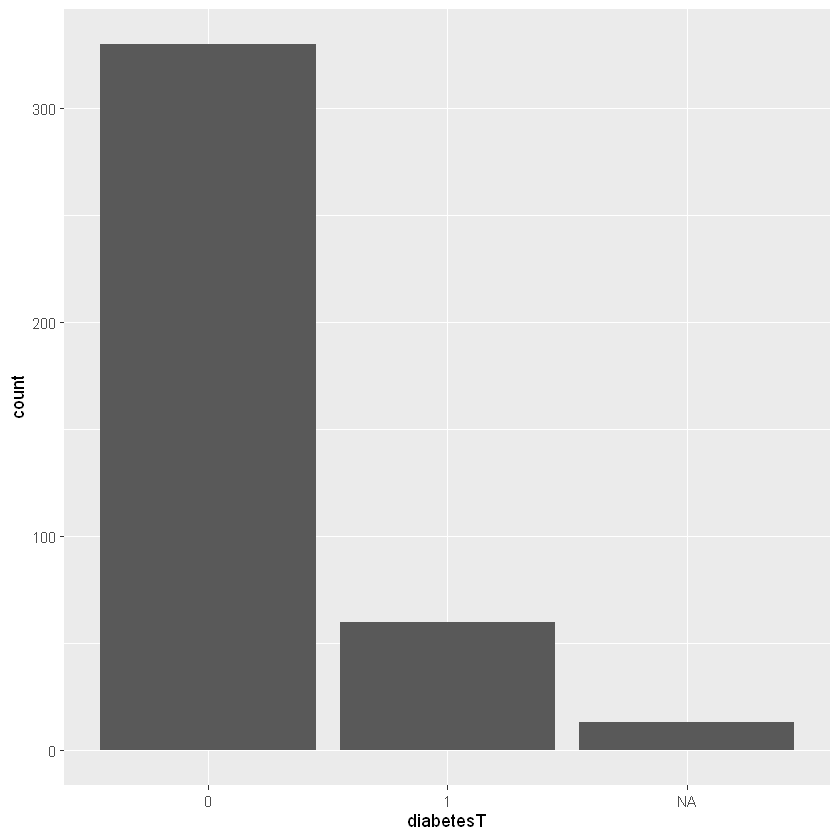

In [10]:
diabetes$diabetesT <- as.factor(ifelse(diabetes$glyhb >= 7, 1, 0))
ggplot(data = diabetes, mapping = aes(x= diabetesT)) + 
geom_bar()


In [12]:
stab.gender.gplot <- ggplot(data= diabetes, mapping = aes(x=gender, y= stab.glu)) + geom_boxplot() + facet_wrap(~location) + labs(
    x = "Gender",
    y = "Stable Glucose Level",
    title = "Glucose Level by Gender and Location"
    
)
ggsave("StabGlucoseLevelGenderLocation.png", plot = stab.gender.gplot, width = 8, height = 6)

Don't know how to automatically pick scale for object of type <labelled>. Defaulting to continuous.


In [ ]:
plot <- ggplot(data = diabetes, mapping = aes(x = gender, y = glyhb)) +
  geom_boxplot() +
  facet_wrap(~location) +
  labs(
    x = "Gender",
    y = "GLYHB Level",
    title = "GLYHB Level by Gender and Location"
  )

ggsave("GLYHBLevelGenderLocation.png", plot = plot, width = 8, height = 6)


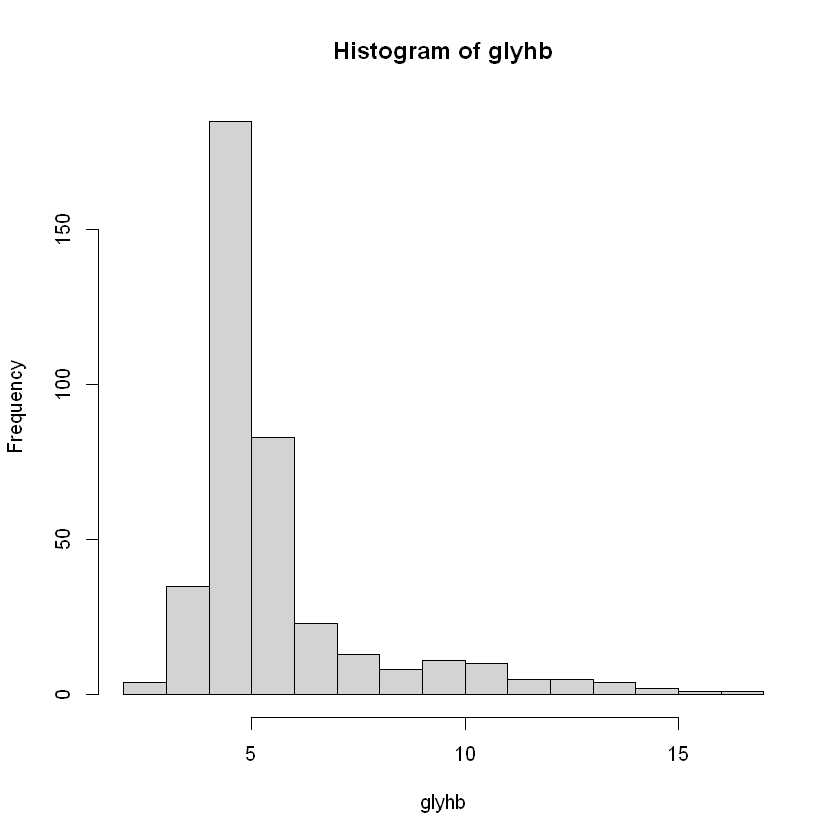

In [14]:
hist(diabetes$glyhb, main="Histogram of glyhb", xlab="glyhb") 

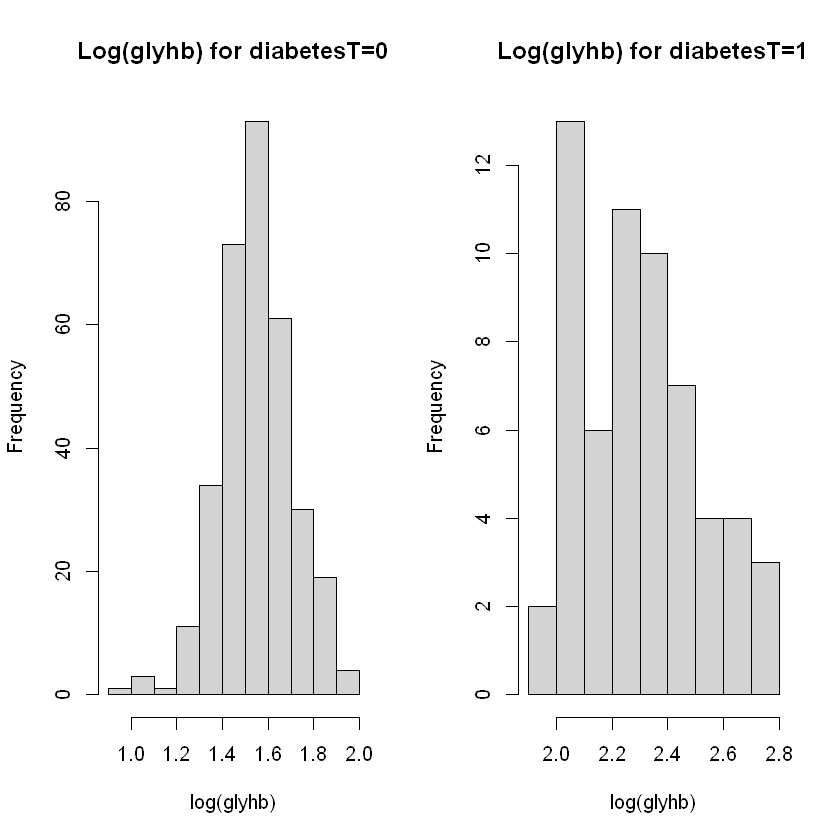

In [16]:
par(mfrow=c(1,2)) 
split_data <- split(log(diabetes$glyhb), diabetes$diabetesT)
hist(split_data[[1]], main="Log(glyhb) for diabetesT=0", xlab="log(glyhb)")
hist(split_data[[2]], main="Log(glyhb) for diabetesT=1", xlab="log(glyhb)")

Don't know how to automatically pick scale for object of type <labelled>. Defaulting to continuous.
Don't know how to automatically pick scale for object of type <labelled>. Defaulting to continuous.
Warning message:
"Removed 13 rows containing missing values or values outside the scale range (`geom_point()`)."


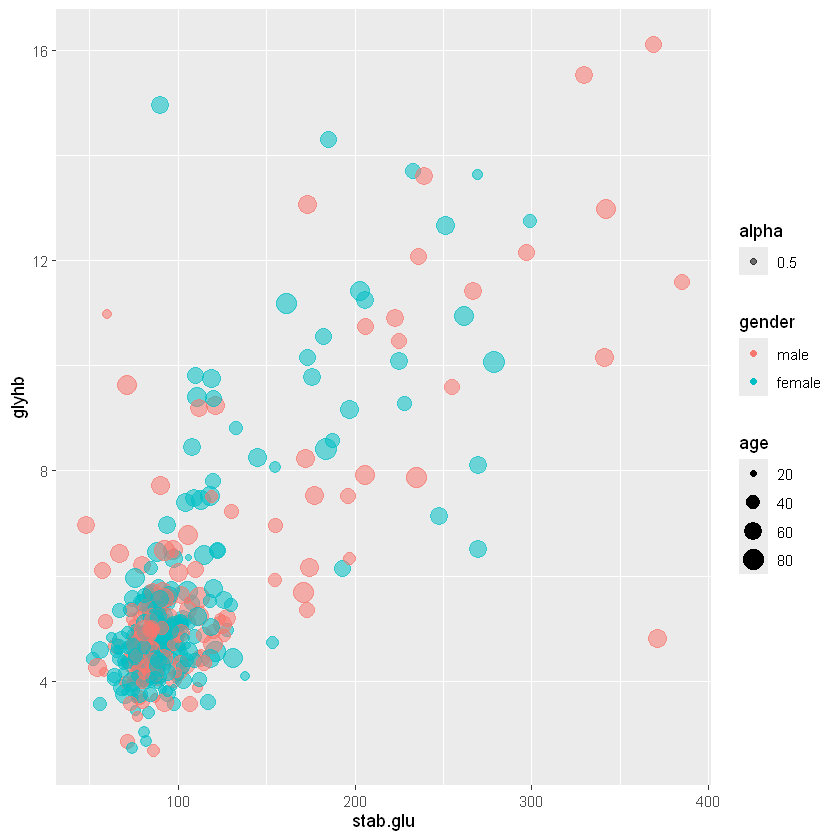

In [18]:
ggplot(data = diabetes, mapping = aes(x=stab.glu, y=glyhb, alpha = 0.5)) + geom_point(aes(size = age, color = gender))

In [20]:
glyhb.stab.scatter <- ggplot(data = diabetes, mapping = aes(x= age, y = log(glyhb))) + geom_point(aes(size = as.numeric(ratio), colour = as.numeric(stab.glu),alpha = 0.5)) + scale_colour_binned() +
facet_wrap(~gender) + labs(x="Age", y="GLYHB", title = "GLYHB age comparison", caption = "Those who are older, tend to have a higher glyhb level with a combination of stab glucose and high ratio") 

ggsave("GLYHBLevelGenderAgeStabGlu.png", plot = glyhb.stab.scatter, width = 8, height = 6)

Don't know how to automatically pick scale for object of type <labelled>. Defaulting to continuous.
Warning message:
"Removed 14 rows containing missing values or values outside the scale range (`geom_point()`)."


In [22]:
scatter.glyhb <- ggplot(data = diabetes, mapping = aes(x=waist, y=glyhb, size = as.numeric(stab.glu), colour = location, alpha = 0.5)) + geom_point() + facet_wrap(~gender)
ggsave("GLYHBLevelGenderLocationScatter.png", plot = scatter.glyhb, width = 8, height = 6)

Don't know how to automatically pick scale for object of type <labelled>. Defaulting to continuous.
Warning message:
"Removed 15 rows containing missing values or values outside the scale range (`geom_point()`)."


## Correlation Analysis

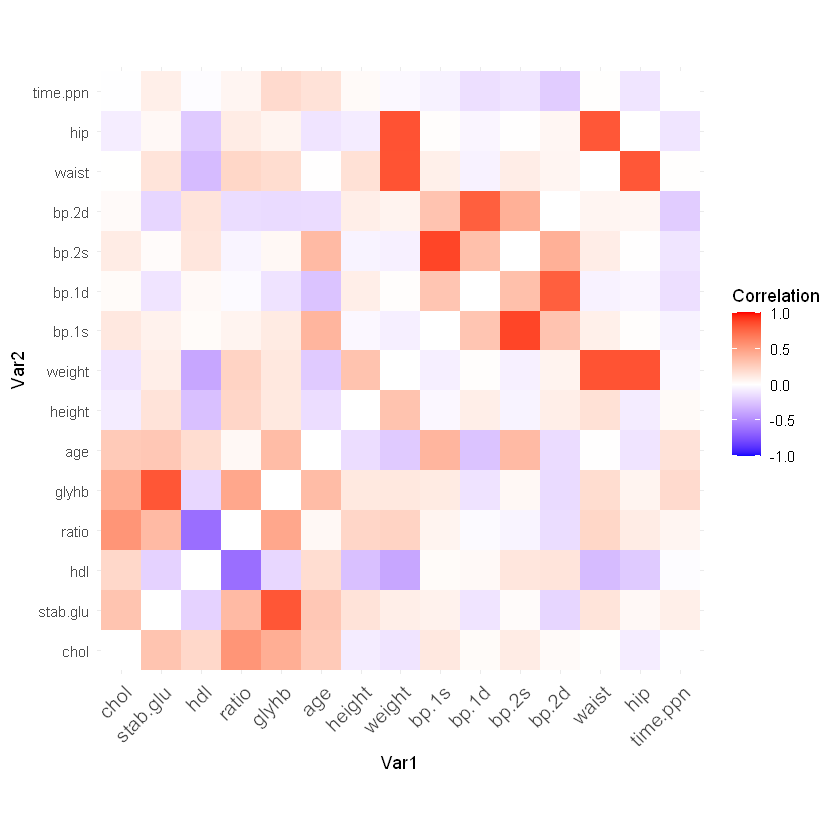

In [24]:
diabetes_clean <- diabetes %>% 
  dplyr::select(-c(id, location, gender, frame, diabetesT)) %>% 
  filter(complete.cases(.))

cor_matrix <- cor(diabetes_clean)
diag(cor_matrix) <- 0 
cor_data <- as.data.frame(as.table(cor_matrix))

ggplot(cor_data, aes(Var1, Var2, fill = Freq)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1, 1), space = "Lab", 
                       name="Correlation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, 
                                   size = 12, hjust = 1)) +
  coord_fixed()

In [26]:
diabetes_clean_T <- diabetes %>% 
  filter(diabetesT == 1) %>%
  dplyr::select(-c(id, location, gender, frame, diabetesT)) %>% 
  filter(complete.cases(.))

cor_matrix_T <- cor(diabetes_clean_T)
diag(cor_matrix_T) <- 0 
cor_data_T <- as.data.frame(as.table(cor_matrix_T))

diabetes_clean_F <- diabetes %>% 
  filter(diabetesT == 0) %>%
  dplyr::select(-c(id, location, gender, frame, diabetesT)) %>% 
  filter(complete.cases(.))

cor_matrix_F <- cor(diabetes_clean_F)
diag(cor_matrix_F) <- 0 
cor_data_F <- as.data.frame(as.table(cor_matrix_F))

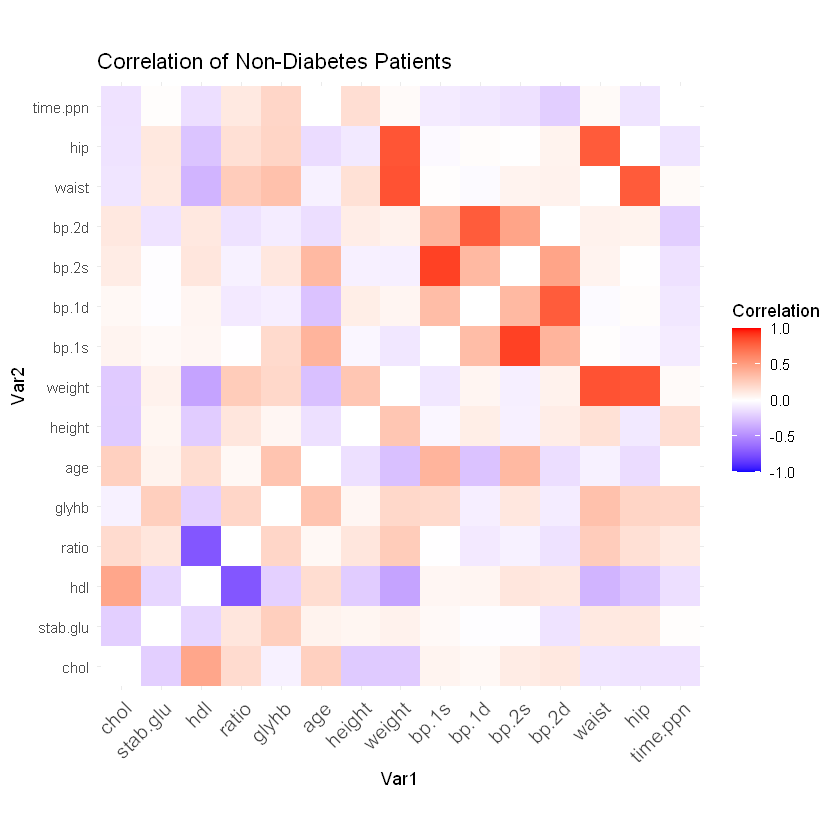

In [28]:
ggplot(cor_data_F, aes(Var1, Var2, fill = Freq)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1, 1), space = "Lab", 
                       name="Correlation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, 
                                   size = 12, hjust = 1)) +
  coord_fixed() +
  ggtitle("Correlation of Non-Diabetes Patients")

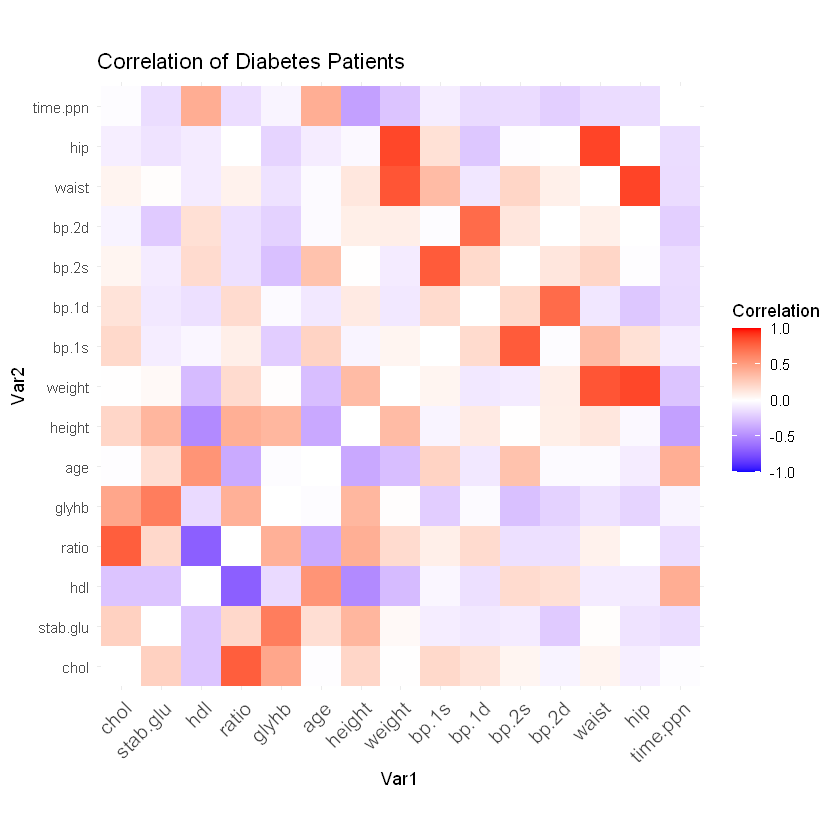

In [30]:
par(mfrow=c(1,2))

ggplot(cor_data_T, aes(Var1, Var2, fill = Freq)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1, 1), space = "Lab", 
                       name="Correlation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, 
                                   size = 12, hjust = 1)) +
  coord_fixed() +
  ggtitle("Correlation of Diabetes Patients")

## Pre-Process

In [32]:
diabetes %>% summarise(across(everything(),~sum(is.na(.)))) %>% select(where(~ . > 0))

chol,hdl,ratio,glyhb,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn,diabetesT
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1,13,5,1,12,5,5,262,262,2,2,3,13


In [34]:
diabetes.drop <- diabetes %>% filter(!is.na(glyhb)) %>% dplyr::select(-c(diabetesT, id))

In [36]:
X <- subset(diabetes.drop, select = -c(glyhb)) #%>% dummy_columns(remove_first_dummy = T, remove_selected_columns = T, ignore_na = T)
y <- log(diabetes.drop$glyhb)

In [38]:
recipe <- recipe(~ ., data = X) %>%
  step_impute_knn(all_predictors()) %>% 
  step_normalize(all_numeric_predictors())  %>%
  step_dummy(all_factor_predictors())

In [40]:
prepared_recipe <- prep(recipe)
diabetes.clean <- bake(prepared_recipe, new_data = NULL)

chol,stab.glu,hdl,ratio,age,height,weight,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn,location_Louisa,gender_female,frame_medium,frame_large
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.09393653,-0.4709910,0.3301899,-0.5307872,-0.04711384,-1.0108656,-1.3939480,-0.8298859,-1.7896547,-0.461453967,-1.94732913,-1.5476112,-0.8932065,1.24223986,0,1,1,0
-0.94435765,-0.1921712,-1.5210095,1.3679372,-1.08143433,-0.4995328,1.0071563,-1.0916725,-1.1254178,0.602259647,-0.55173241,1.4076487,0.8813760,0.07438816,0,1,0,1
0.46555105,-0.2851111,-0.7689597,0.9651774,0.68299474,-1.2665320,1.9477951,2.3115533,0.6458805,2.463758472,0.08262974,1.9291652,2.4785002,-0.50953769,0,1,0,1
-2.89137443,-0.2665231,-2.2152092,1.1377888,1.23057617,0.2674664,-1.4434553,-1.1789347,-2.4538916,-0.394971866,-0.55173241,-0.8522560,-0.8932065,0.46367206,0,0,0,1
0.93552062,-0.3222871,-1.2896095,2.5186790,1.04804903,0.5231328,0.1407785,0.0427361,-0.2397687,0.003920739,-0.67860484,1.0599711,-0.3608318,-0.12025379,0,0,1,0
0.91314111,-0.2479351,1.0822396,-0.5307872,-0.77722242,1.2901320,0.3140540,-0.2190505,0.2030559,-0.062561362,0.59011945,-0.3307395,-0.1833735,-0.46087720,0,0,0,1


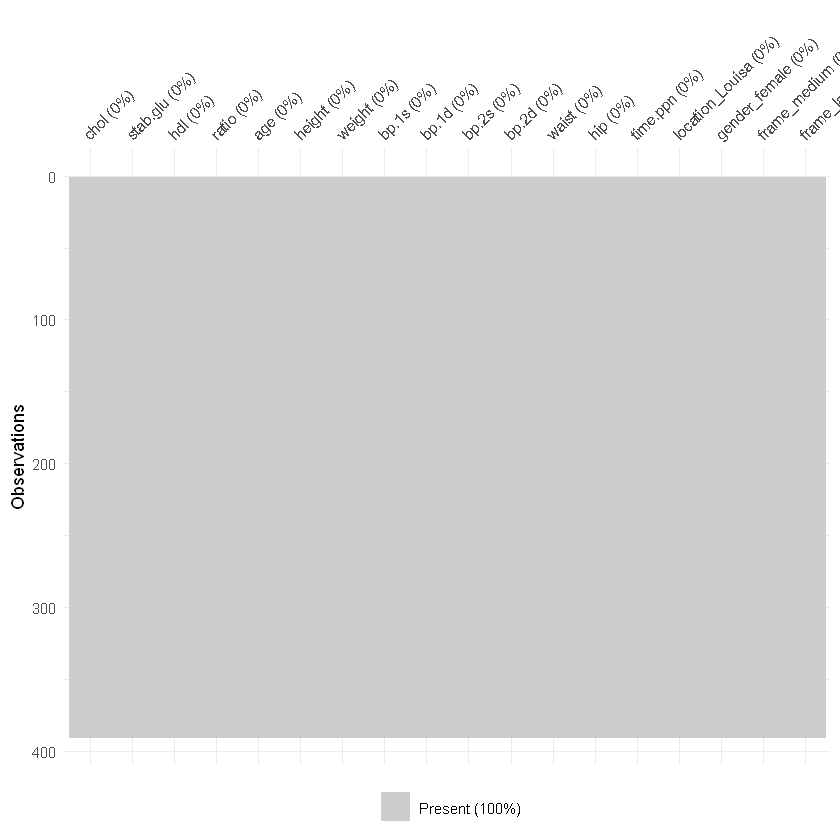

In [42]:
vis_miss(diabetes.clean)
head(diabetes.clean)

## Regression  Model

In [44]:
set.seed(42)
train.indx <- createDataPartition(y = y, p = .8, list = FALSE)

In [46]:
X.train <-diabetes.clean[train.indx,]
X.test <- diabetes.clean[-train.indx,]

y.train <- y[train.indx] 
y.test <- y[-train.indx]

Xy.train <- cbind(X.train, y.train)
Xy.test <- cbind(X.test, y.test)

In [ ]:
linear.model <- lm(y.train~., data = Xy.train)

In [ ]:
summary(linear.model)

In [ ]:
y.hat.lin <- predict(linear.model, X.test)
exp(sqrt(mean((y.hat.lin-y.test)^2)))

In [ ]:
linear.model.interactions <- lm(y.train~stab.glu + age + time.ppn + bp.1d*chol+ gender_female, data = Xy.train)

In [ ]:
interactions <- model.matrix(~(.)^2-1, data = X.train)

In [ ]:
subset.model <- summary(regsubsets(x = interactions, y= y.train, method = "backward"))

In [ ]:
c(selected.variables,"stab.glu", "gender_female", "location_Louisa", "waist", "bp.1s", "frame_medium")

In [ ]:
dim(interactions)

In [ ]:
best.model.index <- which.max(subset.model$adjr2)

best.model.variables <- colnames(interactions)[subset.model$which[best.model.index,]]

print(best.model.variables)

selected.variables <- best.model.variables

X.train.selected <- interactions[, c(selected.variables), drop = FALSE]#,"stab.glu", "gender_female", "location_Louisa", "waist", "bp.1s", "frame_medium"), drop = FALSE]

final.model <- lm(y.train ~ . ,data = as.data.frame(X.train.selected))

summary(final.model)

Gender and Stable Glucose: Females with higher stable glucose levels have significantly higher glyhb levels compared to males, suggesting a stronger relationship between stable glucose and glyhb for females.

Location (Louisa): People in Louisa generally have lower glyhb levels, regardless of stable glucose levels.

Stable Glucose (Overall): Stable glucose is a strong predictor of glyhb levels, significantly increasing glyhb irrespective of gender or location.

Chol: Higher Higher glucose levels overall effect the glyhb levels by 1.03 units when all other vraibales are kept constant.

In [ ]:
plot(final.model)

In [ ]:
interactions.test <- model.matrix(~(.)^2-1, data = X.test)

X.test.selected <- as.data.frame(interactions.test[, c(selected.variables,"stab.glu", "gender_female", "location_Louisa", "waist", "bp.1s", "frame_medium"), drop = FALSE])

In [ ]:
y.hat <- predict(final.model, X.test.selected)
exp(sqrt(mean((y.hat - y.test)^2)))

In [ ]:
par(mfrow=c(1,2))
hist(exp(y.hat), main = "Prediction Distribution")
hist(exp(y.test), main = "Real Distribution")

In [ ]:
plot(tree(exp(y)~.,data=X))
text(tree(exp(y)~.,data=X), pretty = 3, cex = 0.8)

## Bayesian Regression

In [ ]:
model = stan_model("gpriorLM.stan")

In [ ]:
model

### Model Test

In [ ]:
set.seed(123)  # For reproducibility
N <- 100    # Number of observations
K <- 5      # Number of predictors
beta_true <- c(3, -2, 1, 0, 0)  # True coefficients (including zeroes for sparsity)
sigma_true <- 1.5  # True residual standard deviation

X.s <- matrix(rnorm(N * K, mean = 0, sd = 1), nrow = N, ncol = K)

y.s <- X.s %*% beta_true + rnorm(N, mean = 0, sd = sigma_true)

s20 <- mean((y.s - X.s %*% solve(t(X.s) %*% X.s) %*% t(X.s) %*% y.s )^2)
s20

In [ ]:
# mod1_data <- list(
#   X = X.s,
#   K = ncol(X.s),
#   N = nrow(X.s),
#   y = as.vector(y.s),
#   g = nrow(X.s),
#   nu0 = 1,
#   s20 = s20
# )

In [ ]:
mod1_data <- list(
    X = X.s,
    P = ncol(X.s),
    N = nrow(X.s),
    y = as.vector(y.s),
    sigma2 = 1.0,               # Example fixed variance (adjust as needed)
    tau2 = 1.0,                 # Example slab variance (adjust as needed)
    p_prior = 0.5               # Example prior inclusion probability
)

In [ ]:
fit = sampling(model, mod1_data,chains=4)

In [ ]:
beta_true

In [ ]:
posterior_means <- summary(fit)$summary[, "mean"]  
beta_means <- posterior_means[grep("^beta", rownames(summary(fit)$summary))]

comparison <- data.frame(
  True = beta_true,
  Estimated = beta_means
)
print(comparison)

posterior_summary <- summary(fit)$summary
beta_credible <- posterior_summary[grep("^beta", rownames(posterior_summary)), c("2.5%", "97.5%")]

In [ ]:
# Combine for comparison
credible_check <- data.frame(
  True = beta_true,
  lower = beta_credible[, "2.5%"],
  upper = beta_credible[, "97.5%"]
)
credible_check$InInterval <- with(credible_check, True >= lower & True <= upper)
print(credible_check)

In [ ]:
params = extract(fit)

In [ ]:
# mcmc_areas(as.array(fit), pars = c("beta[1]", "beta[2]", "sigma"))
mcmc_areas(as.array(fit), pars = c("beta[1]", "beta[2]"))


In [ ]:
par(mfrow=c(1,4))
ts.plot(params$beta,xlab="Iterations",ylab="beta")
ts.plot(params$sigma,xlab="Iterations",ylab="sigma")

In [ ]:
hist(params$beta,main="",xlab="beta")
hist(params$sigma,main="",xlab="sigma")

In [ ]:

hat_matrix <- posterior_means[grep("^Hg", rownames(summary(fit)$summary))]

hat_matrix <- matrix(hat_matrix, nrow = N, ncol = N)

leverage <- diag(hat_matrix)
hist(leverage, main = "Histogram of Leverage Values", xlab = "Leverage")


### Now with diabetes Data

In [ ]:
X.train <- as.matrix(X.train); y.train <- as.matrix(y.train); X.test <- as.matrix(X.test)
s20 <- mean((y.test - X.test %*% solve(t(X.train) %*% X.train) %*% t(X.train) %*% y.train)^2)
n <- g <- length(y.train); p <- ncol(X.train); nu0 <- 1; S <- 1000

Hg <- g/(g+1) * X.train%*%solve(t(X.train)%*%X.train) %*% t(X.train) 
SSRg <- t(y.train) %*% (diag(1,nrow = n) - Hg) %*% y.train

s2 <- 1/rgamma(S, (nu0+n)/2, (nu0*s20+SSRg)/2)

Vb <- g*solve(t(X.train)%*%X.train)/(g+1)
Eb <- Vb%*%t(X.train)%*%y.train

E <- matrix(rnorm(S*p, 0, sqrt(s2)), S, p)
beta <- t( t(E%*%chol(Vb)) + c(Eb))

In [ ]:
as.data.frame(beta)

In [ ]:
beta.estimates <- as.data.frame(beta) %>%
  summarise(across(
    everything(),
    list(
      mean = mean,
      `2.5%` = ~ quantile(.x, 0.025),
      `97.5%` = ~ quantile(.x, 0.975)
    ),
    .names = "{.col}_{.fn}"
  )) %>%
  pivot_longer(
    cols = everything(),
    names_to = "name",
    values_to = "value"
  ) %>%
  separate(
    col = name,
    into = c("beta", "stat"),
    sep = "_(?=[^_]+$)"
  ) %>%
  pivot_wider(
    names_from = stat,
    values_from = value
  ) %>%
  column_to_rownames(var = "beta")


In [ ]:
beta.estimates

In [ ]:
beta.estimates <- beta.estimates %>%
  rownames_to_column(var = "beta") %>%
  mutate(significant = ifelse(`2.5%` > 0 | `97.5%` < 0, "Significant", "Not Significant"))

In [ ]:
beta.est.plot <- ggplot(beta.estimates, aes(x = beta, y = mean, ymin = `2.5%`, ymax = `97.5%`, color = significant)) +
  geom_pointrange() +
  geom_hline(yintercept = 0, linetype = "dashed") +
  labs(title = "Beta Estimates with Confidence Intervals",
       x = "Beta",
       y = "Estimate") +
  theme_minimal() +
  scale_color_manual(values = c("Significant" = "red", "Not Significant" = "blue")) + coord_flip()
beta.est.plot

In [ ]:
ggsave("betaEstimatesGPrior.png", plot = beta.est.plot)

In [ ]:
B <- as.matrix(beta.estimates$mean, nrow=nrow(beta.estimates), ncol=1)

In [ ]:
y.hat.bayes <- X.test %*% B

In [ ]:
exp(mean((y.hat.bayes - y.test)^2))

## Model Selection

In [ ]:
tau2 <- as.numeric(var(y.train) / mean(apply(X.train, 2, var)))
as.numeric(tau2)

In [ ]:
data_list <- list(
  N = nrow(X.train),               # Number of observations
  P = ncol(X.train),                 # Number of predictors
  X = X.train, # Random design matrix (replace with your data)
  y = as.vector(y.train),        # Response variable (replace with your data)
  sigma2 = as.numeric(var(y.train)),            # Fixed variance for likelihood
  tau2 = tau2,              # Variance of slab for coefficients
  p_prior = 0.5          # Prior inclusion probability
)

In [ ]:
fit <- stan(file = "gpriorLM.stan", data = data_list, seed = 42, chains = 4)

In [ ]:
fit

In [71]:
## GG

# Initialize variables
included_vars <- rep(0, ncol(X.train))  # Start with all variables excluded
current_vars <- included_vars
current_vars[1] <- 1  # Always include the intercept
variable_names <- colnames(X.train)

# Stan model file
stan_file <- "gpriorLM.stan"  # Ensure the Stan file matches the earlier specification

# Bayesian Model Selection Loop
for (i in 1:ncol(X.train)) {
  # Update the data list for Stan
  data_list <- list(
  N = nrow(X.train),               # Number of observations
  P = ncol(X.train),                 # Number of predictors
  X = X.train, # Random design matrix (replace with your data)
  y = as.vector(y.train),        # Response variable (replace with your data)
  sigma2 = as.numeric(var(y.train)),            # Fixed variance for likelihood
  tau2 = as.numeric(var(y.train) / mean(apply(X.train, 2, var))), # Variance of slab for coefficients
  p_prior = 0.5          # Prior inclusion probability
)
  
  # Fit the model
  fit <- stan(file = stan_file, data = data_list, seed = 42, chains = 4, iter = 2000)
  print("FIT:")
  print(fit)
  # Extract inclusion probabilities
  fit_summary <- summary(fit, pars = "inclusion_probs")$summary
  inclusion_probs <- fit_summary[, "mean"]
  
  # Find the variable with the highest posterior inclusion probability
  new_var <- which.max(inclusion_probs)
  if (current_vars[new_var] == 1) break  # If no new variable, stop the loop
  
  # Include the selected variable
  current_vars[new_var] <- 1
  cat("Adding variable:", variable_names[new_var], "\n")
}

# Final Model
final_data_list <- list(
  N = nrow(X.train),
  P = sum(current_vars),
  X = X.train[, which(current_vars == 1), drop = FALSE],
  y = y.train,
  sigma2 = as.numeric(var(y.train)),            # Fixed variance for likelihood
  tau2 = as.numeric(var(y.train) / mean(apply(X.train, 2, var))), # Variance of slab for coefficients
  p_prior = 0.5          # Prior inclusion probability
)
final_model <- stan(file = stan_file, data = final_data_list, seed = 42, chains = 4, iter = 4000)

# Posterior predictive checks
y_pred <- as.matrix(final_model, pars = "y_pred")  # Replace "y_pred" with appropriate Stan output
posterior_mean <- colMeans(y_pred)
posterior_sd <- apply(y_pred, 2, sd)

# Model evaluation
cat("Posterior predictive mean:", mean(posterior_mean), "\n")
cat("Posterior predictive SD:", mean(posterior_sd), "\n")

# Save results
saveRDS(final_model, file = "final_model.rds")


Warning message:
"There were 282 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them."
Warning message:
"Examine the pairs() plot to diagnose sampling problems
"
Warning message:
"Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#tail-ess"


[1] "FIT:"
Inference for Stan model: anon_model.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                       mean se_mean   sd    2.5%     25%     50%     75%
beta[1]                0.01    0.00 0.02   -0.02    0.00    0.01    0.02
beta[2]                0.18    0.00 0.02    0.14    0.17    0.18    0.19
beta[3]               -0.01    0.00 0.02   -0.04   -0.02    0.00    0.01
beta[4]                0.02    0.00 0.02   -0.02    0.00    0.01    0.03
beta[5]                0.04    0.00 0.02    0.00    0.03    0.04    0.06
beta[6]                0.34    0.00 0.02    0.30    0.32    0.34    0.36
beta[7]                0.00    0.00 0.02   -0.05   -0.02    0.00    0.01
beta[8]                0.01    0.00 0.02   -0.02    0.00    0.01    0.03
beta[9]                0.00    0.00 0.02   -0.03   -0.01    0.00    0.01
beta[10]              -0.01    0.00 0.02   -0.05   -0.02   -0.01    0.00
beta[11]              -0.05   

Warning message:
"There were 282 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them."
Warning message:
"Examine the pairs() plot to diagnose sampling problems
"
Warning message:
"Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#tail-ess"


[1] "FIT:"
Inference for Stan model: anon_model.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                       mean se_mean   sd    2.5%     25%     50%     75%
beta[1]                0.01    0.00 0.02   -0.02    0.00    0.01    0.02
beta[2]                0.18    0.00 0.02    0.14    0.17    0.18    0.19
beta[3]               -0.01    0.00 0.02   -0.04   -0.02    0.00    0.01
beta[4]                0.02    0.00 0.02   -0.02    0.00    0.01    0.03
beta[5]                0.04    0.00 0.02    0.00    0.03    0.04    0.06
beta[6]                0.34    0.00 0.02    0.30    0.32    0.34    0.36
beta[7]                0.00    0.00 0.02   -0.05   -0.02    0.00    0.01
beta[8]                0.01    0.00 0.02   -0.02    0.00    0.01    0.03
beta[9]                0.00    0.00 0.02   -0.03   -0.01    0.00    0.01
beta[10]              -0.01    0.00 0.02   -0.05   -0.02   -0.01    0.00
beta[11]              -0.05   

In [74]:
# STANGLM
print(final_model)

Inference for Stan model: anon_model.
4 chains, each with iter=4000; warmup=2000; thin=1; 
post-warmup draws per chain=2000, total post-warmup draws=8000.

                       mean se_mean   sd     2.5%      25%      50%      75%
beta[1]                0.09    0.00 0.02     0.06     0.08     0.09     0.10
beta[2]                1.63    0.00 0.02     1.59     1.62     1.64     1.65
inclusion_probs[1]     0.08    0.00 0.06     0.01     0.04     0.07     0.11
inclusion_probs[2]     0.92    0.00 0.06     0.77     0.89     0.93     0.96
z[1]                   0.08    0.00 0.06     0.01     0.04     0.07     0.11
z[2]                   0.92    0.00 0.06     0.77     0.89     0.93     0.96
y_pred[1]              1.55    0.00 0.31     0.95     1.34     1.55     1.76
y_pred[2]              1.68    0.00 0.32     1.07     1.47     1.68     1.89
y_pred[3]              0.08    0.00 0.32    -0.52    -0.13     0.08     0.29
y_pred[4]             -0.02    0.00 0.31    -0.63    -0.24    -0.02     0.

In [96]:
fit_params <- rstan::extract(final_model, pars = "inclusion_probs")
inclusion_probs_mean <- colMeans(fit_params$inclusion_probs)


inclusion_data <- data.frame(
  Variable = variable_names,
  Inclusion_Probability = inclusion_probs_mean
)

# Print the data frame to see the probabilities associated with each variable
print(inclusion_data)

          Variable Inclusion_Probability
1             chol            0.08120594
2         stab.glu            0.91879406
3              hdl            0.08120594
4            ratio            0.91879406
5              age            0.08120594
6           height            0.91879406
7           weight            0.08120594
8            bp.1s            0.91879406
9            bp.1d            0.08120594
10           bp.2s            0.91879406
11           bp.2d            0.08120594
12           waist            0.91879406
13             hip            0.08120594
14        time.ppn            0.91879406
15 location_Louisa            0.08120594
16   gender_female            0.91879406
17    frame_medium            0.08120594
18     frame_large            0.91879406
